## Проект: принятие решений в бизнесе

#### Цель: приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты

#### Описание данных:

Файл /datasets/hypothesis.csv
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале

Файл /datasets/orders.csv
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ

Файл /datasets/visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

#### Ход проекта:

1. Предобработка данных
2. Приоритезация гипотез
3. Анализ А/Б теста:
* График кумулятивной выручки по группам
* График кумулятивного среднего чека по группам
* График относительного изменения кумулятивного среднего чека группы B к группе A
* График кумулятивной конверсии по группам
* График относительного изменения кумулятивной конверсии группы B к группе A
* Точечный график количества заказов по пользователям
* Определение аномальных пользователей
* График стоимостей заказов
* Подсчет статистической значимости различий в конверсии между группами по «сырым» данным. 
* Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.
* Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.
* Подсчет статистическoй значимости различий в конверсии между группами по «очищенным» данным.
* Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.
4. Выводы

### Предобработка данных

Импортируем библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import scipy.stats as stats
import datetime as dt

Загрузим данные и проверим типы данных:

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Видим, что пропусков в данных нет. Приведем названия столбцов к нижнему регистру, даты- в тип даты.

In [8]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()
orders['date'] =  pd.to_datetime(orders['date'])
visitors['date'] =  pd.to_datetime(visitors['date'])

Посмотрим на данные более подробно и убедимся, что в данных нет явных аномалий:

In [9]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [10]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [11]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

Проверим, что в данных нет явных дубликатов:

In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.duplicated().sum()

0

#### Вывод
Мы привели названиe столбцов к нижнему регистру, убедились, что в данных нет пропусков и явных аномалий, явных и неявных дубликатов, привели столбцы к нужным типам. Тепепрь  можем приступать к следующему шагу.

### Приоретизация гипотез

Применим фреймворк ICE для приоритизации гипотез и отсотритруем их по убыванию приоритета:

In [14]:
hypothesis['ice'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.sort_values(by = 'ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


ICE включает в себя 3 фактора - влияние, легкость в реализации и уверенность в оценке влияния, легкости в реализации. По этому методу на первом месте гипотеза №9, на втором гипотеза №1, на третьем - гипотеза №8.

Применим фреймворк RICE для приоритизации гипотез oтсортируем их по убыванию приоритета.

In [15]:
hypothesis['rice'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.sort_values(by = 'rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


RICE включает в себя 4 фактора - охват, влияние, трудозатраты и уверенность в оценке охвата, влияния и трудозатрат. По этому метроду на первом месте гипотеза №8, на втором гипотеза №3, на третьем -гипотеза №1.

Методы отличаются тем, что в RICE учитывается скольких пользователей затронет изменение, которое предполагается внести. Если необходимо предложить одну гипотезу - то это будет гипотеза №8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Анализ А/Б теста

#### График кумулятивной выручки по группам

Создаём датафрейм dategroups с уникальными парами значений 'date' и 'group', таблицы orders, избавляемся от дубликатов и объявляем переменную ordersaggregated,содержащую:
* дату;
* группу A/B-теста;
* число уникальных заказов в группе теста по указанную дату включительно;
* число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
* суммарную выручку заказов в группе теста по указанную дату включительно.

In [16]:
datesgroups = orders[['date','group']].drop_duplicates() 
ordersaggregated = datesgroups.apply(lambda x: 
orders[np.logical_and(orders['date'] <= x['date'], 
orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 
'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Создаем переменную visitorsaggregated, содержащую:
* дату;
* группу A/B-теста;
* количество уникальных посетителей в группе теста по указанную дату включительно

In [17]:
visitorsaggregated = datesgroups.apply(lambda x: 
visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 
'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Создаем переменную cumulativedata, объединив ordersaggregated и visitorsaggregated по колонкам 'date', 'group' методом merge() и присваиваем столбцам необходимые названия:

In [18]:
cumulativedata = ordersaggregated.merge(visitorsaggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativedata.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Сохраним данные о датах, выручке и числе заказов в группах A и B в переменныx cumulativerevenue_a и cumulativerevenue_b и построим графики кумулятивной выручки по дням по группам.

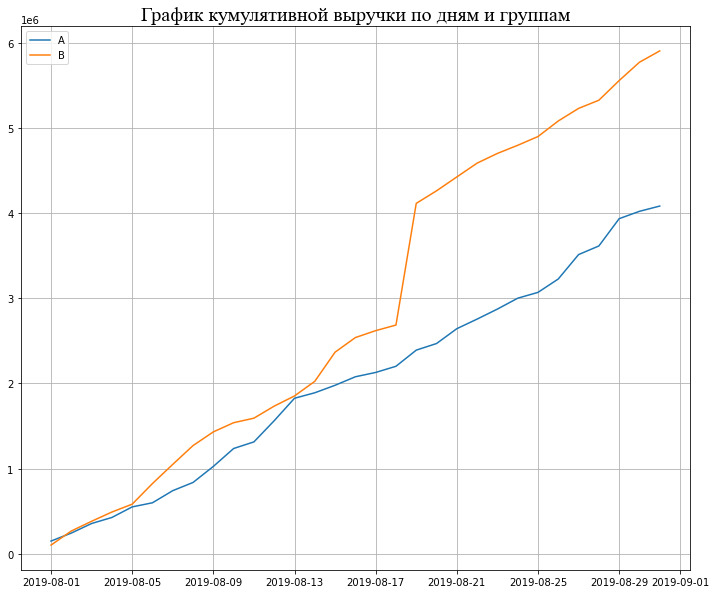

In [19]:
cumulativerevenue_a = cumulativedata[cumulativedata['group']=='A'][['date','revenue', 'orders']]
cumulativerevenue_b = cumulativedata[cumulativedata['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize =(12, 10)) 
plt.plot(cumulativerevenue_a['date'], cumulativerevenue_a['revenue'], label='A')
plt.plot(cumulativerevenue_b['date'], cumulativerevenue_b['revenue'], label='B')
plt.legend()
plt.grid(True)
plt.title('График кумулятивной выручки по дням и группам', fontsize=20, fontname='Times New Roman')
None

В середине теста у группы B резко повысились значения, после чего группа продолжила лидировать. Вероятно есть аномальные заказы, которые влияют на результаты.

#### График кумулятивного среднего чека по группам

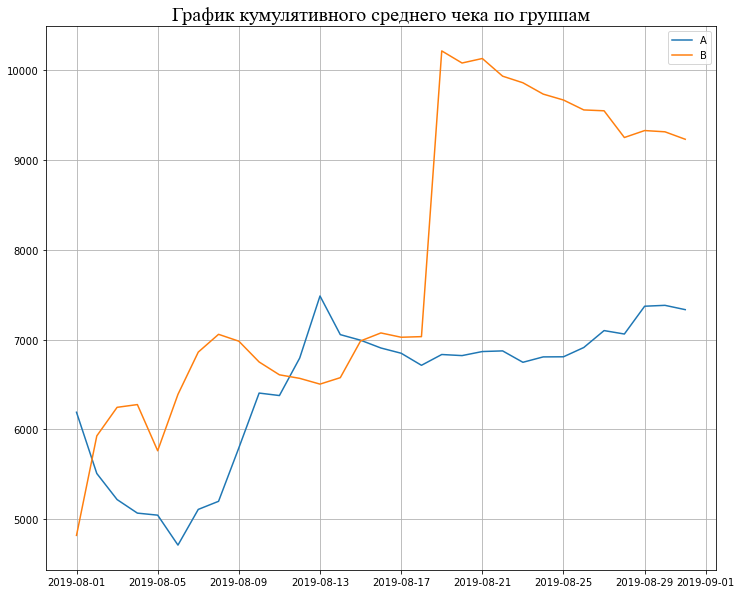

In [20]:
plt.figure(figsize =(12, 10)) 
plt.plot(cumulativerevenue_a['date'], cumulativerevenue_a['revenue']/cumulativerevenue_a['orders'], label='A')
plt.plot(cumulativerevenue_b['date'], cumulativerevenue_b['revenue']/cumulativerevenue_b['orders'], label='B')
plt.legend() 
plt.grid(True)
plt.title('График кумулятивного среднего чека по группам', fontsize=20, fontname='Times New Roman')
None

Мы видим резкий рост кумулятивного значения среднего чека у группы B, энеобходимо провести дополнительный анализ выбросов, которые сильно искажают результаты.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

Сохраним в переменной mergeсumulativeкevenue нужные столбцы, объединив таблицы cumulativeкevenue_a и cumulativerevenue_b методом merge() и построим график относительного различия кумулятивного среднего чека группы B к группе A.

In [21]:
mergedсumulativerevenue = cumulativerevenue_a.merge(cumulativerevenue_b, left_on='date', 
right_on='date', how='left', suffixes=['A', 'B'])
mergedсumulativerevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


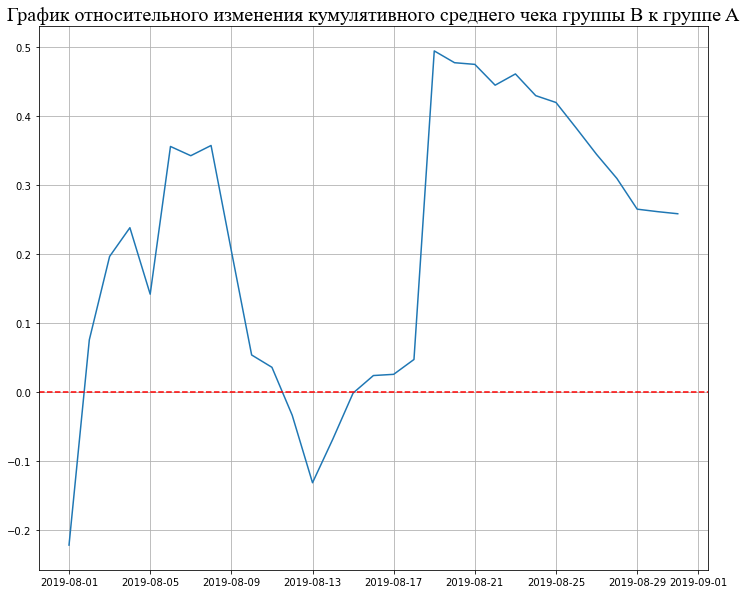

In [22]:
plt.figure(figsize =(12, 10)) 
plt.plot(mergedсumulativerevenue['date'], 
(mergedсumulativerevenue['revenueB']/mergedсumulativerevenue['ordersB'])/
         (mergedсumulativerevenue['revenueA']/mergedсumulativerevenue['ordersA'])-1)
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', 
          fontsize=20, fontname='Times New Roman')
None

Есть несколько дат, когда результаты теста значительно и резко менялись- верояно тогда и произошли аномальные выбросы.

#### График кумулятивной конверсии по группам

Добавим в cumulativedata столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

In [23]:
cumulativedata['conversion'] = cumulativedata['orders']/cumulativedata['visitors']

Сохраним в переменных cumulativedata_a и cumulativedata_b данные о заказах в группах А и B и построим график.

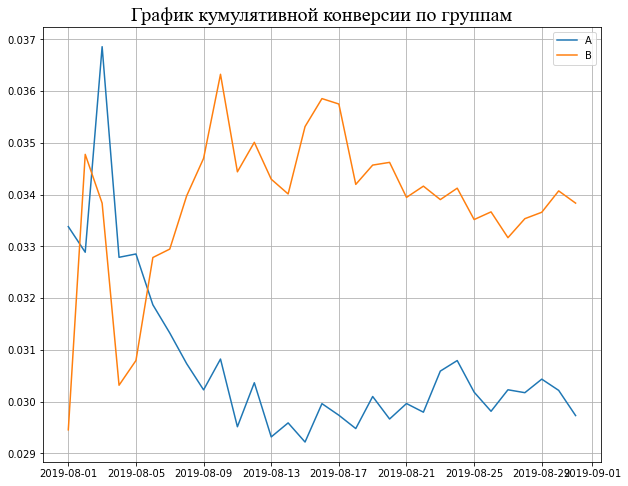

In [24]:
cumulativedata_a = cumulativedata[cumulativedata['group']=='A']
cumulativedata_b = cumulativedata[cumulativedata['group']=='B']
plt.figure(figsize =(10, 8)) 
plt.plot(cumulativedata_a ['date'],cumulativedata_a ['conversion'], label='A')
plt.plot(cumulativedata_b['date'], cumulativedata_b['conversion'], label='B')
plt.legend()
plt.grid(True)
plt.title('График кумулятивной конверсии по группам', fontsize=20, fontname='Times New Roman')
None

В начале большее значение имела группа А, затем значения резко снизились и лидером стала группа B. Построим:
#### График относительного изменения кумулятивной конверсии группы B к группе A

Создадим переменную mergedсumulativeсonversion, объединив таблицы cumulativedata_a и cumulativedata_b и построим график.

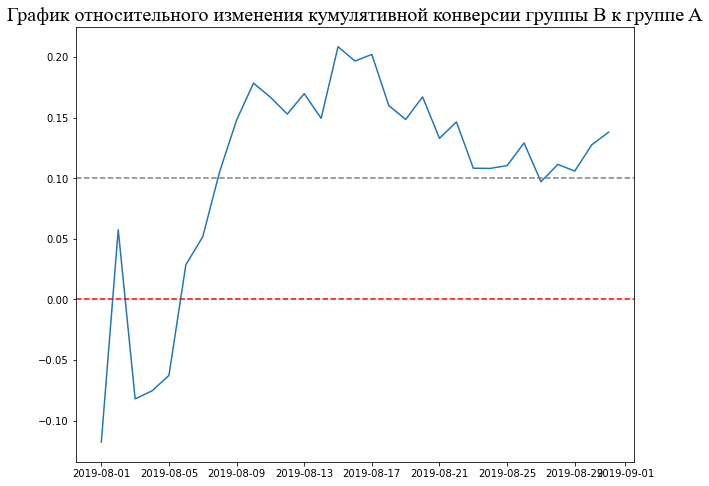

In [25]:
mergedсumulativeсonversion = cumulativedata_a[['date','conversion']].merge(cumulativedata_b[['date','conversion']],
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize =(10, 8)) 
plt.plot (mergedсumulativeсonversion['date'], 
mergedсumulativeсonversion['conversionB']/ mergedсumulativeсonversion['conversionA']-1)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A',fontsize=20, fontname='Times New Roman')

None

Группа B лидирует по конверсии, показатели конверсии меняются от 10 до 20% прироста, но можно сказать, что группа B точно показывает прирост 10% .

#### Точечный график количества заказов по пользователям

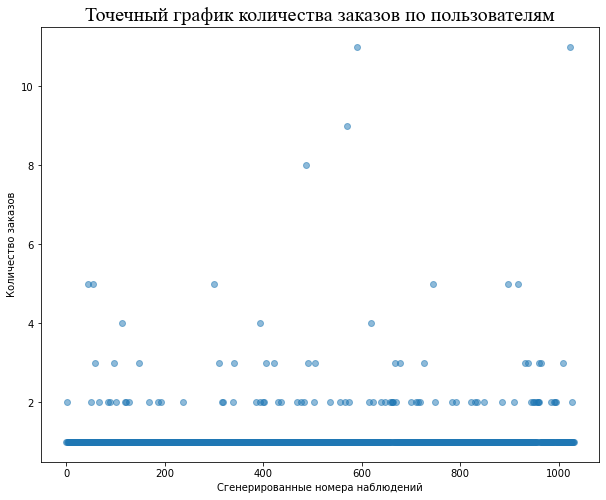

In [26]:
ordersbyusers = orders.groupby('visitorid', as_index=False).agg({'transactionid': 'nunique'})
ordersbyusers.columns = ['visitorid', 'orders']
x_values = pd.Series(range(0, len(ordersbyusers)))
plt.figure(figsize=(10, 8))
plt.scatter(x_values, ordersbyusers['orders'], alpha = 0.5)
plt.title('Точечный график количества заказов по пользователям', fontsize=20, fontname='Times New Roman')
plt.xlabel('Сгенерированные номера наблюдений')
plt.ylabel('Количество заказов')
None

Пользователей, заказавших более 2х раз- совсем немного. Проверим являются ли они аномальными, посчитав выборочные перцентили.

#### Определение аномальных пользователей

In [27]:
np.percentile(ordersbyusers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершало больше 2х заказов и не более 1% - больше 4х заказов. 

#### Построим график стоимостей заказов

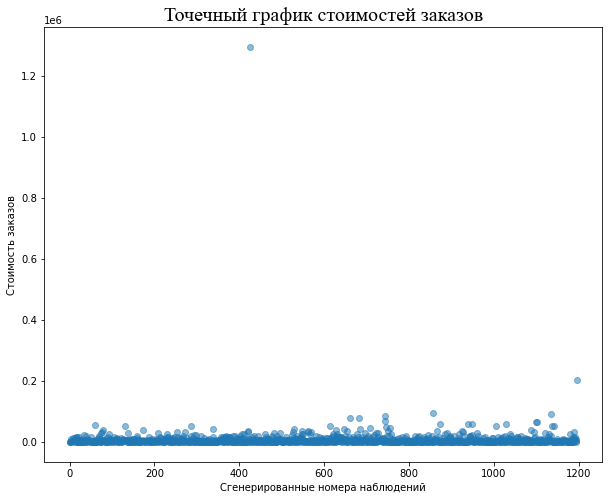

In [28]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 8))
plt.scatter(x_values, orders['revenue'],alpha = 0.5) 
plt.title('Точечный график стоимостей заказов', fontsize=20, fontname='Times New Roman')
plt.xlabel('Сгенерированные номера наблюдений')
plt.ylabel('Стоимость заказов')
None

Видим выбросы в районе 200 тыс руб и более 1.2. млн руб. Посчитаем перцентили:

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 тыс руб и не более 1% дороже 58233 руб.Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Создадим переменные, в которых для пользователей будет указано число заказов:

In [30]:
ordersbyusersa = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersbyusersa.columns = ['user_id', 'orders']

ordersbyusersb = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersbyusersb.columns = ['user_id', 'orders']

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Создадим переменные в которых посчитаем количество по визитам и их кумулятивные показатели по группам.

In [31]:
visitorsadaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsadaily.columns = ['date', 'visitors_date_a']

visitorsacummulative = visitorsadaily.apply(
    lambda x: visitorsadaily[visitorsadaily['date'] <= x['date']].agg({'date': 'max', 'visitors_date_a': 'sum'}),axis=1)
visitorsacummulative.columns = ['date', 'visitors_cummulative_a']
visitorsacummulative.head()

,date,visitors_cummulative_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [32]:
visitorsbdaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsbdaily.columns = ['date', 'visitors_date_b']

visitorsbcummulative = visitorsbdaily.apply(
    lambda x: visitorsbdaily[visitorsbdaily['date'] <= x['date']].agg({'date': 'max', 'visitors_date_b': 'sum'}),axis=1)
visitorsbcummulative.columns = ['date', 'visitors_cummulative_b']
visitorsbcummulative.head()

,date,visitors_cummulative_b
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Создадим переменные, в которых посчитаем стоимость заказа на каждую дату для обеих групп.

In [33]:
ordersadaily = orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})

ordersadaily.columns = ['date', 'orders_date_a', 'revenue_date_a']

ordersacummulative = ordersadaily.apply(
    lambda x: ordersadaily[ordersadaily['date'] <= x['date']].agg
    ({'date': 'max', 'orders_date_a': 'sum', 'revenue_date_a': 'sum'}),axis=1).sort_values(by=['date'])

ordersacummulative.columns = ['date','orders_cum_a','revenue_cum_a']
ordersacummulative.head()

,date,orders_cum_a,revenue_cum_a
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [34]:
ordersbdaily = orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']].groupby(
'date', as_index=False).agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})

ordersbdaily.columns = ['date', 'orders_date_b', 'revenue_date_b']

ordersbcummulative = ordersbdaily.apply(
    lambda x: ordersbdaily[ordersbdaily['date'] <= x['date']].agg
        ({'date': 'max', 'orders_date_b': 'sum', 'revenue_date_b': 'sum'}),axis=1).sort_values(by=['date'])

ordersbcummulative.columns = [
    'date',
    'orders_cum_b',
    'revenue_cum_b',
]
ordersbcummulative.head()

,date,orders_cum_b,revenue_cum_b
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Соединим все таблицы вместе:

In [35]:
data = ordersadaily.merge(ordersbdaily, left_on='date', right_on='date', how='left')\
    .merge(ordersacummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersbcummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsadaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsbdaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsacummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsbcummulative, left_on='date', right_on='date', how='left')
data.head()

,date,orders_date_a,revenue_date_a,orders_date_b,revenue_date_b,orders_cum_a,revenue_cum_a,orders_cum_b,revenue_cum_b,visitors_date_a,visitors_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Объявим переменные sample_a и sample_b, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. 

Каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sample_a — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sample_a методом mean(). Аналогично найдём среднее группы B: SampleB.mean().
Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1. 

Нулевая гипотеза: cтатистически значимых различий в среднем между группами нет. Альтернативная гипотеза: различия в среднем между группами есть. Пороговое значение - 5% (alpha=0.05).

In [36]:
sample_a = pd.concat([ordersbyusersa['orders'],
                      pd.Series(0, index=np.arange(data['visitors_date_a'].sum() - len(ordersbyusersa['orders'])), 
                                name='orders')],axis=0)
sample_b = pd.concat([ordersbyusersb['orders'],
                      pd.Series(0, index=np.arange(data['visitors_date_b'].sum() - len(ordersbyusersb['orders'])), 
                                name='orders')],axis=0)

print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print('Относительный прирост группы B к группе A = {0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value = 0.017
Относительный прирост группы B к группе A = 0.138


p-value меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет можем отвергнуть, т.е. по "сырым данным" в конверсии между группами есть различие. Относительный прирост среднего группы B  к конверсии группы A - 13.8%. 
Осталось сравнить средние чеки по "сырым данным", а затем еще раз-после удаления выбросов.

#### Посчитаем  статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами
Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. Пороговое значение - 5% (alpha=0.05).

In [37]:
print('p_value = {0:.3f}'.format
      (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Статистическая значимость различий = {0:.3f}'.format
      (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p_value = 0.729
Статистическая значимость различий = 0.259


p_value больше 0.05, мы не можем отвергунть нулевую гипотезу. При этом относительный прирост среднего чека группы B  - 25.9%. 
Это очень много. Вероятно очищенные данные покажут нам другую картину.

Мы помним, что у нас не более 5% пользователей совершало больше 2х заказов и не более 1% - больше 4х заказов. 

Не более 5% заказов дороже 28 тыс руб и не более 1% дороже 58233 руб.

Примем за аномальных пользователей тех, кто совершил 4 заказа и более на сумму более 30 тыс руб. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.
Cоздадим срезы таких пользователей и объедингим их в общую таблицу.

In [38]:
# много заказов
many_orders = pd.concat([ordersbyusersa[ordersbyusersa['orders'] >3]['user_id'],
        ordersbyusersb[ordersbyusersb['orders'] >3]['user_id']],axis=0)
# дорогие заказы
expensive_orders = orders[orders['revenue'] > 30000]['visitorid']

# аномальные пользователи
anomal_users = pd.concat([many_orders, expensive_orders], axis=0).drop_duplicates().sort_values()

#### Посчитаем статистическую значимость различия конверсии по "очищенным" данным.

Создадим переменные с "очищенными" данными и посчитаем статистическую значимость различия.

In [39]:
sample_a_filtr = pd.concat([ordersbyusersa[np.logical_not(ordersbyusersa['user_id'].isin(anomal_users))]['orders'],
                      pd.Series(0, index=np.arange(data['visitors_date_a'].sum() - len(ordersbyusersa['orders'])),
                                 name='orders')],axis=0)
sample_b_filtr = pd.concat([ordersbyusersb[np.logical_not(ordersbyusersb['user_id'].isin(anomal_users))]['orders'],
                      pd.Series(0, index=np.arange(data['visitors_date_b'].sum() - len(ordersbyusersb['orders'])), 
                                name='orders')],axis=0)

print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtr, sample_b_filtr)[1]))

print('Относительный прирост группы B к группе A = {0:.3f}'.format(sample_b_filtr.mean() / sample_a_filtr.mean() - 1))

p-value = 0.018
Относительный прирост группы B к группе A = 0.148


p-value меньше 0.05, значит нулевую гипотезу отвергаем. Относительный прирост группы B к группе A  - 14.8% (выше, чем по "сырым данным", где было 13.8%). В любом случае мы убедились, что группа B лучше группы A.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [40]:
print('p_value = {0:.3f}'.format
      (stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', 
                                                np.logical_not(orders['visitorid'].isin(anomal_users)))]['revenue'], 
                          orders[np.logical_and(orders['group']=='B',
                                                np.logical_not(orders['visitorid'].isin(anomal_users)))]['revenue'])[1]))  


print('Статистическая значимость различий = {0:.3f}'.format
      (orders[np.logical_and(orders['group']=='B', 
                             np.logical_not(orders['visitorid'].isin(anomal_users)))]['revenue'].mean()
       /orders[np.logical_and(orders['group']=='A',
                             np.logical_not(orders['visitorid'].isin(anomal_users)))]['revenue'].mean()-1)) 

p_value = 0.958
Статистическая значимость различий = -0.020


p_value почти равно единице, значит нулевую гипотезу не отвергаем, как и при анализе по "сырым" данным.

Средний чек группы B на 2% ниже, чем средний чек группы A. Хотя в "сырых данных" он был больше на 25.9%, на него влияли аномальные данные, которые мы исключили.

#### Решение по результатам теста

У нас есть три варианта решений:
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Мы не будем брать в расчет различия в средних чеках между группами, так как и по сырым и по очищенным данным - мы не можем отвергнуть нулевую гипотезу, что различий в среднем чеке между группами нет.

При этом, по результатам анализа конверсий между группами, и по очищенным данным и по сырым - мы отвергли нулеую гипотезу, то есть отличия в конверсии есть. Относительный прирост по сырым данным - 13.8%, а по очищенным даже выше - 14.8%.
Это говорит о том, что мы однозначно можем выбрать первый вариант решения и зафиксировать победу группы B над группой A.